## Iris data Using Decision Tree Algorithm

In [112]:
# Import the required packags

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [113]:
# load the dataset

dataset = pd.read_csv("Iris.csv")

### Explore the dataset

In [114]:
dataset.head(10) # the first 10 rows of data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [115]:
dataset.columns # the feature columns (Species is 'label')

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [116]:
# Basic Information regarding data

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [117]:
# information about data for each numeric features

dataset.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [118]:
# value counts for each class labels

dataset.Species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

### Visualizing the Data

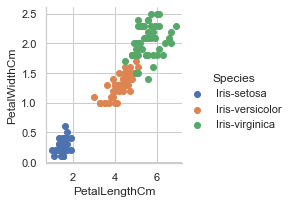

In [119]:
# visualizing the "PetalLengthCm" and "PetalWidthCm"

#Using Seaborn lib to visualized 2 features based on target variable.
sns.set(rc={"figure.figsize":(20, 20)})
sns.set_style('whitegrid')
sns.FacetGrid(dataset, hue = 'Species').map(plt.scatter, 'PetalLengthCm','PetalWidthCm').add_legend()

plt.show()

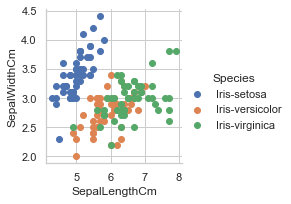

In [120]:
#Using Seaborn lib to visualized 2 features based on target variable.

sns.set(rc={"figure.figsize":(20, 20)})
sns.set_style('whitegrid')
sns.FacetGrid(dataset, hue = 'Species').map(plt.scatter, 'SepalLengthCm','SepalWidthCm').add_legend()

plt.show()

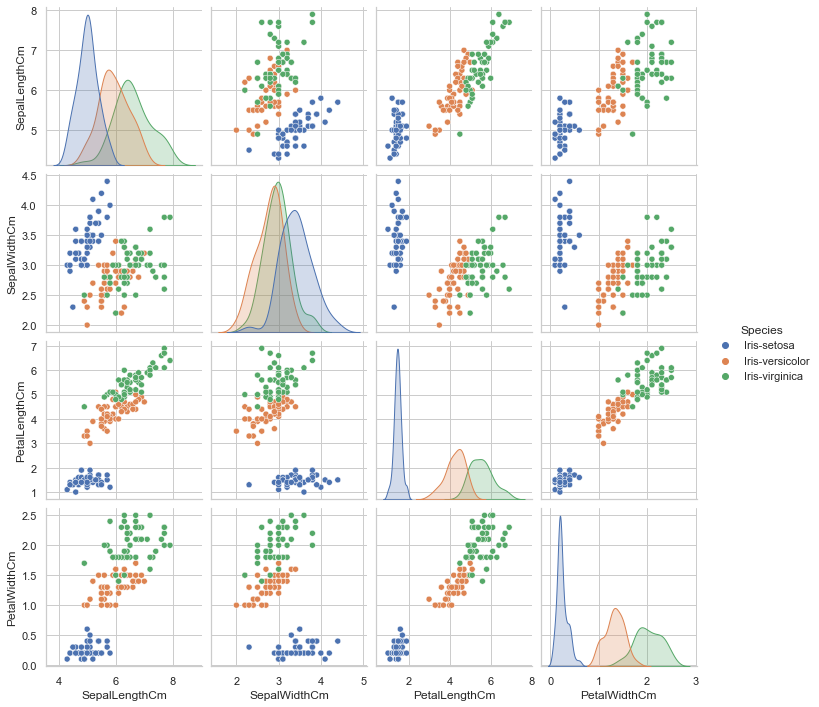

In [121]:
# the relationship between all features distribution with each other.

sns.pairplot(dataset.drop(['Id'],axis=1), hue='Species')
plt.show()

### Exploring New Features

In [122]:
#Just trying to explore some new feature using the given data...

dataset['Sepal_diff'] = dataset['SepalLengthCm']- dataset['SepalWidthCm']
dataset['petal_diff'] = dataset['PetalLengthCm']- dataset['PetalWidthCm']

dataset['Sepal_petal_len_wid_diff'] = dataset['SepalLengthCm'] - dataset['PetalWidthCm']
dataset['Sepal_petal_wid_len_diff'] = dataset['SepalWidthCm'] - dataset['PetalLengthCm']

In [123]:
#Droping Id column as it is of no use in classifing the class labels

#dataset.drop(['Id'],axis=1,inplace=True)

In [124]:
dataset.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species', 'Sepal_diff', 'petal_diff', 'Sepal_petal_len_wid_diff',
       'Sepal_petal_wid_len_diff'],
      dtype='object')

### Prepare For Training

In [125]:
X = dataset[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
             'Sepal_diff', 'petal_diff', 'Sepal_petal_len_wid_diff',
             'Sepal_petal_wid_len_diff']]

In [126]:
y = dataset['Species']

In [127]:
y.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [128]:
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import train_test_split
import graphviz


encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

In [129]:
y_encoded

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [130]:
# split the dataset for training and testing

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.30, random_state=42)

In [131]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(105, 8)
(105,)
(45, 8)
(45,)


In [132]:
#spliting data into validation train and validation test

Xt, Xcv, Yt, Ycv = train_test_split(X_train, y_train, test_size=0.10, random_state=42)

In [133]:
# train the decision model

DecisionTree_clf = DecisionTreeClassifier(criterion='gini',max_depth=5,min_samples_split=3)
DecisionTree_clf.fit(Xt, Yt)

DecisionTreeClassifier(max_depth=5, min_samples_split=3)

[Text(496.0, 996.6, 'X[2] <= 2.6\ngini = 0.665\nsamples = 94\nvalue = [30, 30, 34]'),
 Text(372.0, 815.4000000000001, 'gini = 0.0\nsamples = 30\nvalue = [30, 0, 0]'),
 Text(620.0, 815.4000000000001, 'X[7] <= -1.9\ngini = 0.498\nsamples = 64\nvalue = [0, 30, 34]'),
 Text(372.0, 634.2, 'X[3] <= 1.75\ngini = 0.153\nsamples = 36\nvalue = [0, 3, 33]'),
 Text(248.0, 453.0, 'X[4] <= 3.6\ngini = 0.49\nsamples = 7\nvalue = [0, 3, 4]'),
 Text(124.0, 271.79999999999995, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(372.0, 271.79999999999995, 'X[6] <= 5.3\ngini = 0.375\nsamples = 4\nvalue = [0, 3, 1]'),
 Text(248.0, 90.59999999999991, 'gini = 0.0\nsamples = 3\nvalue = [0, 3, 0]'),
 Text(496.0, 90.59999999999991, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(496.0, 453.0, 'gini = 0.0\nsamples = 29\nvalue = [0, 0, 29]'),
 Text(868.0, 634.2, 'X[3] <= 1.65\ngini = 0.069\nsamples = 28\nvalue = [0, 27, 1]'),
 Text(744.0, 453.0, 'gini = 0.0\nsamples = 26\nvalue = [0, 26, 0]'),
 Text(992.0, 

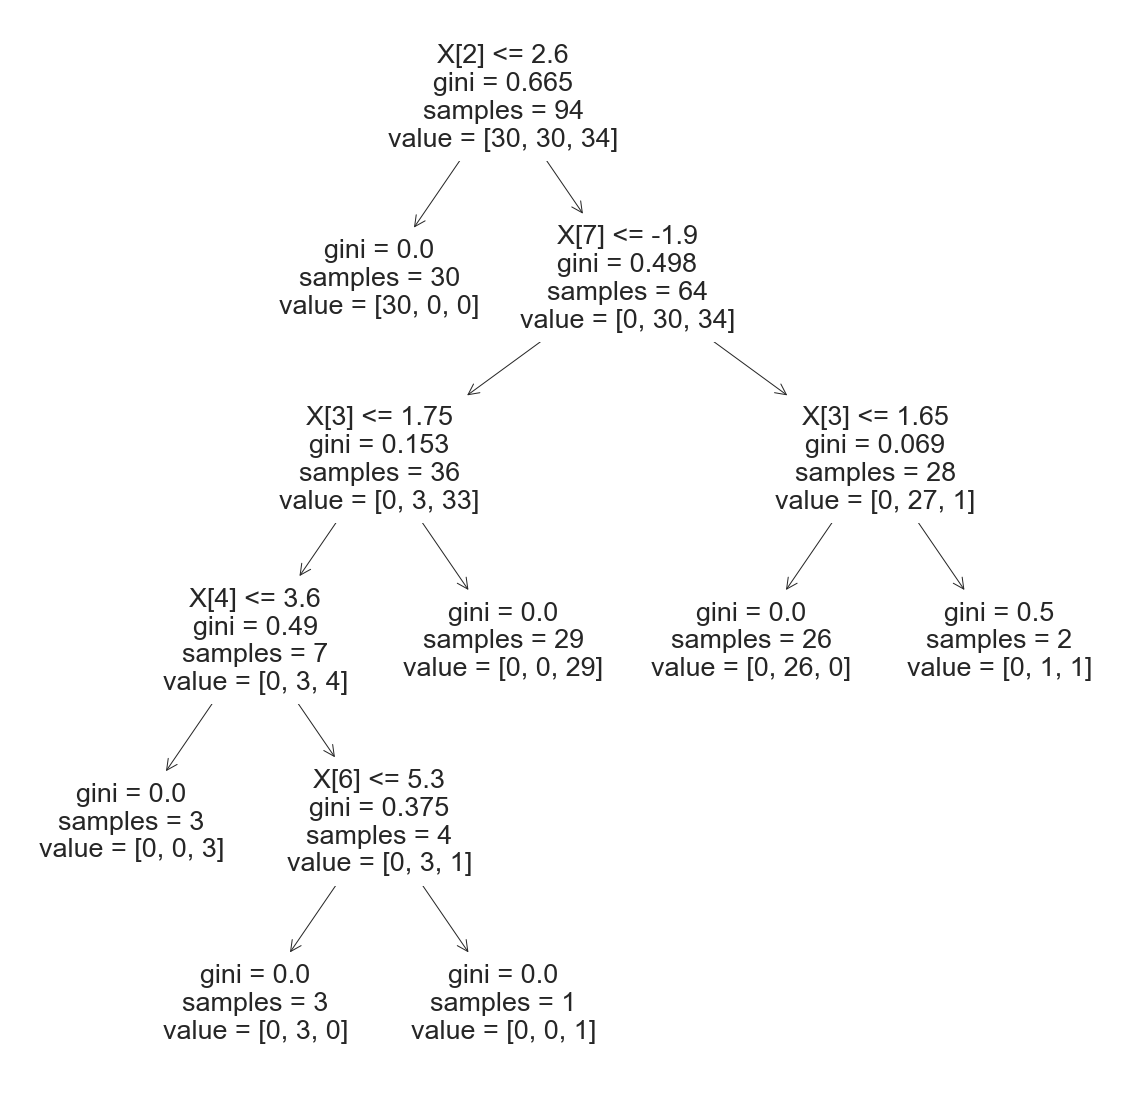

In [134]:
# visualize the result

tree.plot_tree(DecisionTree_clf)

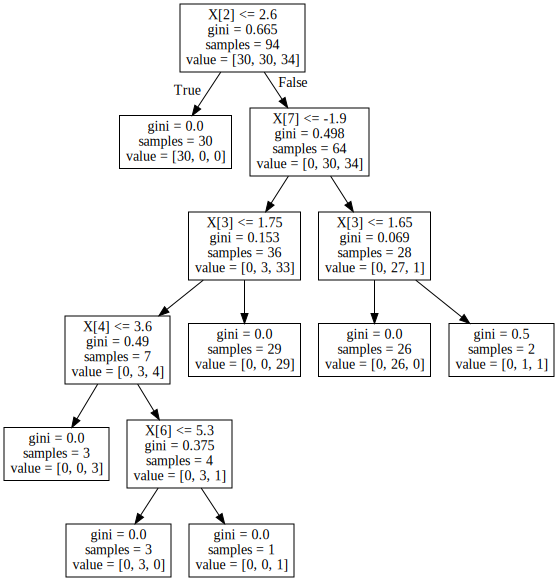

In [135]:
#Visualizing Decision Tree using graphviz library

dot_data = tree.export_graphviz(DecisionTree_clf, out_file=None)

graph = graphviz.Source(dot_data)
graph

In [136]:
print('Accuracy score is:',cross_val_score(DecisionTree_clf, Xt, Yt, cv=3, scoring='accuracy').mean())

Accuracy score is: 0.9254032258064516


In [137]:
# accuracy on cross validation

from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

Y_hat = DecisionTree_clf.predict(Xcv)


print('Accuracy score for validation test data is:',accuracy_score(Ycv, Y_hat))
multilabel_confusion_matrix(Ycv , Y_hat)

Accuracy score for validation test data is: 0.8181818181818182


array([[[10,  0],
        [ 0,  1]],

       [[ 3,  1],
        [ 1,  6]],

       [[ 7,  1],
        [ 1,  2]]], dtype=int64)

In [138]:
# Check model performance on actual unseen test data

YT_hat = DecisionTree_clf.predict(X_test)
YT_hat

print('Model Accuracy Score on totally unseen data(X_test) : {:.2f}'.format(accuracy_score(y_test, YT_hat)*100,'%'))
multilabel_confusion_matrix(y_test , YT_hat)

Model Accuracy Score on totally unseen data(X_test) : 95.56


array([[[26,  0],
        [ 0, 19]],

       [[32,  0],
        [ 2, 11]],

       [[30,  2],
        [ 0, 13]]], dtype=int64)

[Text(496.0, 996.6, 'X[2] <= 2.6\ngini = 0.665\nsamples = 94\nvalue = [30, 30, 34]'),
 Text(372.0, 815.4000000000001, 'gini = 0.0\nsamples = 30\nvalue = [30, 0, 0]'),
 Text(620.0, 815.4000000000001, 'X[7] <= -1.9\ngini = 0.498\nsamples = 64\nvalue = [0, 30, 34]'),
 Text(372.0, 634.2, 'X[3] <= 1.75\ngini = 0.153\nsamples = 36\nvalue = [0, 3, 33]'),
 Text(248.0, 453.0, 'X[4] <= 3.6\ngini = 0.49\nsamples = 7\nvalue = [0, 3, 4]'),
 Text(124.0, 271.79999999999995, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(372.0, 271.79999999999995, 'X[6] <= 5.3\ngini = 0.375\nsamples = 4\nvalue = [0, 3, 1]'),
 Text(248.0, 90.59999999999991, 'gini = 0.0\nsamples = 3\nvalue = [0, 3, 0]'),
 Text(496.0, 90.59999999999991, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(496.0, 453.0, 'gini = 0.0\nsamples = 29\nvalue = [0, 0, 29]'),
 Text(868.0, 634.2, 'X[3] <= 1.65\ngini = 0.069\nsamples = 28\nvalue = [0, 27, 1]'),
 Text(744.0, 453.0, 'gini = 0.0\nsamples = 26\nvalue = [0, 26, 0]'),
 Text(992.0, 

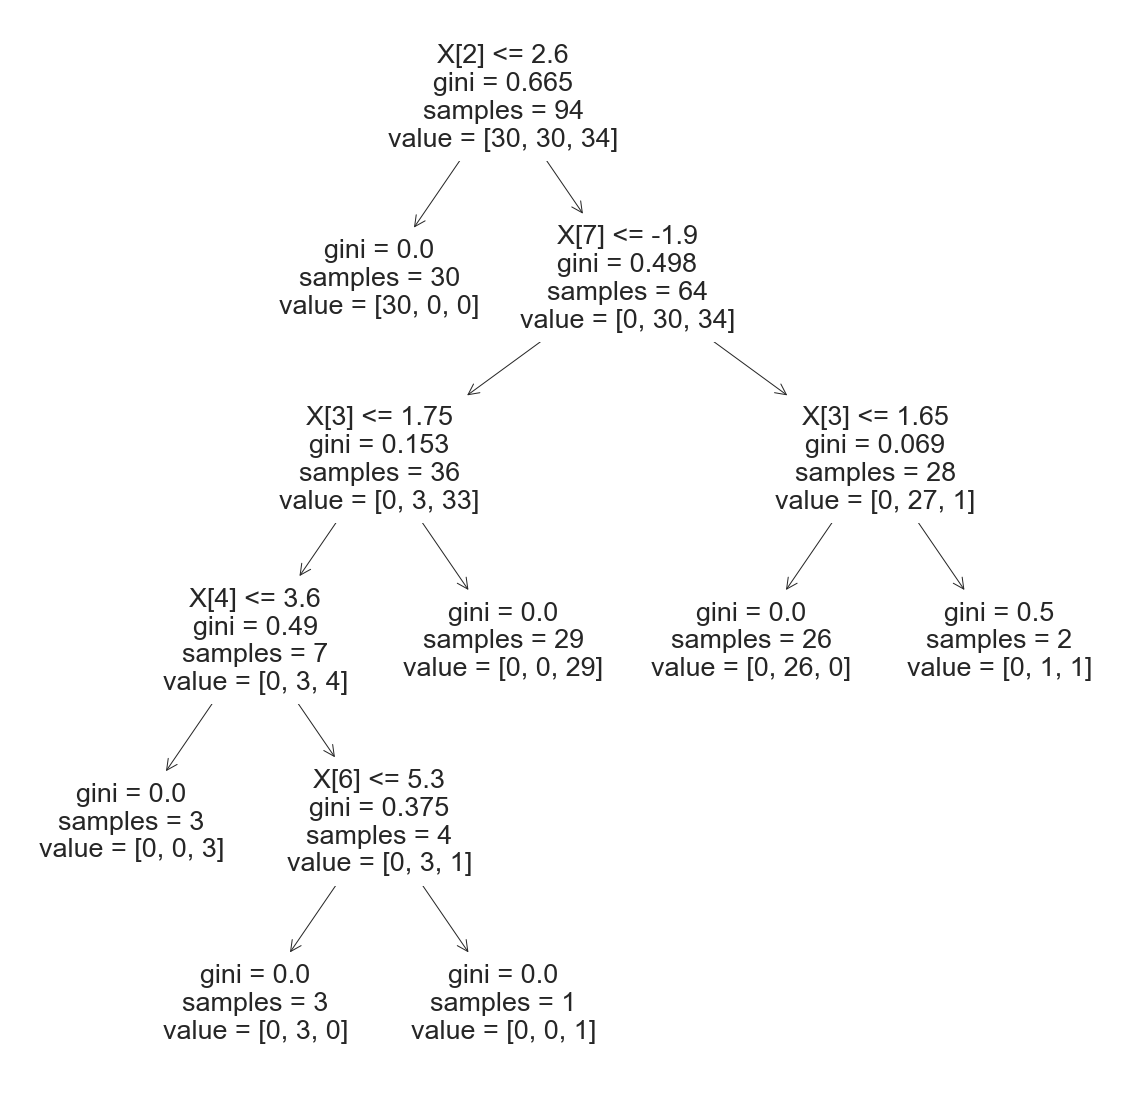

In [139]:
#Visualize tree structure..
tree.plot_tree(DecisionTree_clf)

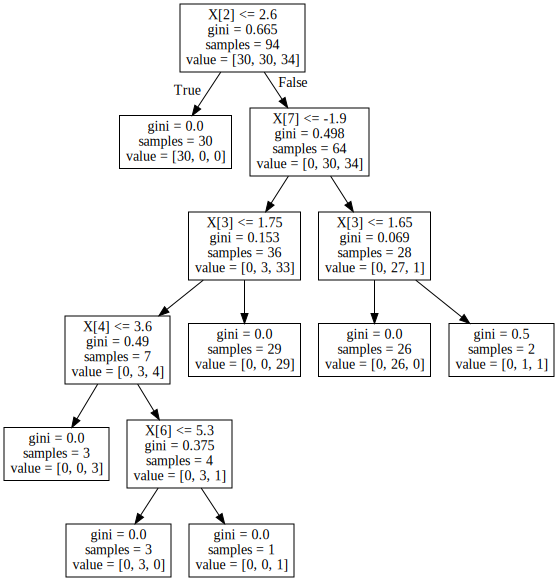

In [140]:
#Final Decision tree building graph 

dot_data = tree.export_graphviz(DecisionTree_clf, out_file=None)
graph = graphviz.Source(dot_data)
graph

In [141]:
#Testing for New points except from Dataset

Test_point = [[5.4,2.5,3.8,1.1,3.0,2.7,4.5,-1.3 ],
             [6.5,2.8,4.6,1.5,2.9,2.3,4.6,-1.1],
             [5.1,2.5,3.0,1.1,3.2,2.4,4.4,-1.4],
             [2.1,3.3,1.7,0.5,3.6,2.8,4.7,0.1],
             [6.0,2.7,5.1,1.6,4.4,3.0,5.0,-1.5],
             [5.0,2.2,5.0,1.5,3.8,3.7,4.4,-0.8],
             [5.5,2.4,3.7,1.0,3.1,2.7,4.5 ,-1.3]]

In [142]:
# testing with new features 

predictions = DecisionTree_clf.predict(Test_point)
predictions

array([1, 1, 1, 0, 1, 1, 1])

In [143]:
encoder.inverse_transform(predictions)

array(['Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor'], dtype=object)